In [1]:
import tensorflow as tf
print("yess" if tf.config.list_physical_devices('GPU') else "noo")

yess


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!unzip "/content/drive/MyDrive/dog-breed-identification.zip" -d "/content/drive/MyDrive/DogVision"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("/content/drive/MyDrive/DogVision/labels.csv")
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
labels = [label for label in df['breed']]
filenames = ["/content/drive/MyDrive/DogVision/train/"+id+".jpg" for id in df["id"]]
labels[:5], filenames[:5]

(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever'],
 ['/content/drive/MyDrive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
  '/content/drive/MyDrive/DogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
  '/content/drive/MyDrive/DogVision/train/001cdf01b096e06d78e9e5112d419397.jpg',
  '/content/drive/MyDrive/DogVision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
  '/content/drive/MyDrive/DogVision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg'])

In [7]:
len(labels), len(filenames)

(10222, 10222)

In [8]:
unique_breeds = np.unique(labels)
print(len(unique_breeds), unique_breeds)

120 ['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'
 'ita

In [9]:
bool_labels = [unique_breeds == label for label in labels]
print(len(bool_labels),bool_labels[:5])

10222 [array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False]), array([False, False, False, False, False, False, Fals

Reading files using "Image" from IPython

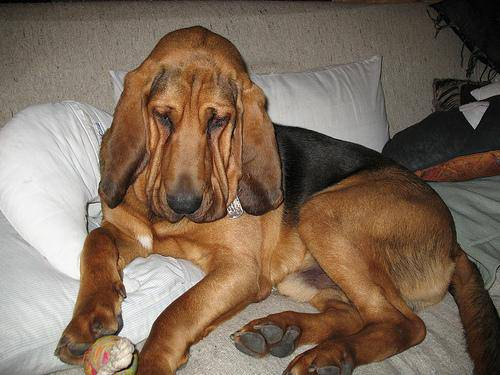

In [10]:
from IPython.display import Image
Image(filenames[69])

In [11]:
print(labels[69], np.argmax(bool_labels[69]), bool_labels[69])

bloodhound 14 [False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


Reading files using "ImShow" from matplotlib

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
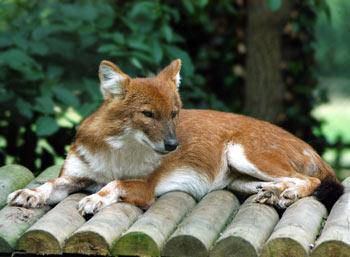

In [12]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image

**Preprocessing the image**
1. read the image (output: tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00......)
2. decode the image, i.e: convert to numbers format (output: tf.Tensor(
[[[107  45   0]
  [151  91  41]
  [177 119  69]
  ...))

3. convert to float and normalize-divide by 225 in this case, (output: tf.Tensor
[[[0.41960788 0.1764706  0.        ]
  [0.5921569  0.35686275 0.16078432]
  [0.69411767 0.4666667  0.27058825]
  ...)

4. and lastly resize the image to 224,224 (output: tf.Tensor(
[[[0.5705322  0.33588538 0.15008473]
  [0.66901225 0.4601166  0.26022965]
  [0.61062384 0.43763596 0.21601713]
  ...
  ))

In [13]:
def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  image = tf.image.resize(image, size=[224,224])
  return image

In [14]:
def process_with_label(image_paths, label):
  image = process_image(image_path=image_paths)
  return image, label

**Now we create a function to convert this to batch**

In [15]:
BATCH_SIZE = 32
def create_batch(x, y=None, batch_size=BATCH_SIZE, test_data=False, val_data=False):
  """
  x = fileNames of the data
  y = corresponding label for the file
  if it is test or val data set either one to True, if not leave it be for train data
  """
  if test_data:
    print(f"Creating test batches of size {BATCH_SIZE}")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x))
    data = data.map(process_image)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

  elif val_data:
    print(f"Creating validation data batches of size {BATCH_SIZE}")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data = data.map(process_with_label)
    data_batch = data.batch(batch_size=BATCH_SIZE)
    return data_batch

  else:
    print(f"Creating training data batches of size {BATCH_SIZE}")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data = data.shuffle(buffer_size=len(x), seed=42)
    data = data.map(process_with_label)
    data_batch = data.batch(batch_size=BATCH_SIZE)
  return data_batch

**We First try to train the model on 1000 images because if any mistakes occur, debugging for smaller data is easy than trying to write code and debug for larger data**

In [16]:
X_1000 = filenames[:1000]
y_1000 = bool_labels[:1000]
len(X_1000), len(y_1000)

(1000, 1000)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_1000, y_1000, test_size=0.2, random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [18]:
train_batch = create_batch(x_train, y_train)
val_batch = create_batch(x_val, y_val, val_data=True)
print("using elem_spec: ",train_batch.element_spec)
print("using just train_batch: ",train_batch)
print(len(train_batch))
print(len(val_batch))

Creating training data batches of size 32
Creating validation data batches of size 32
using elem_spec:  (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))
using just train_batch:  <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>
25
7


In [19]:
print(train_batch)
print(train_batch.take(1))
print(train_batch.as_numpy_iterator()) #**** np.argmax cannot be applied to takedataset("take()") therefore it is better to use this, to be able to apply np.argmax

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>
NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7b477dbece60>)


In [67]:
print(train_batch.take(1))


<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>


In [68]:
#visualizing the data batch
def batch_viz(batch_data, batch_num=1, batch_size=32):
  """
  provide the batch that needs to be visualized
  """
  plt.figure(figsize=(12,12))
  for image, label in batch_data.take(batch_num):
    for i in range(batch_size):
      ax = plt.subplot(8, 4, i+1)
      plt.imshow(image[i])
      plt.title(unique_breeds[np.argmax(label[i])])
      plt.xticks([])
      plt.yticks([])
      plt.tight_layout(pad=2.0, w_pad=7.0) # to avoid overlapping

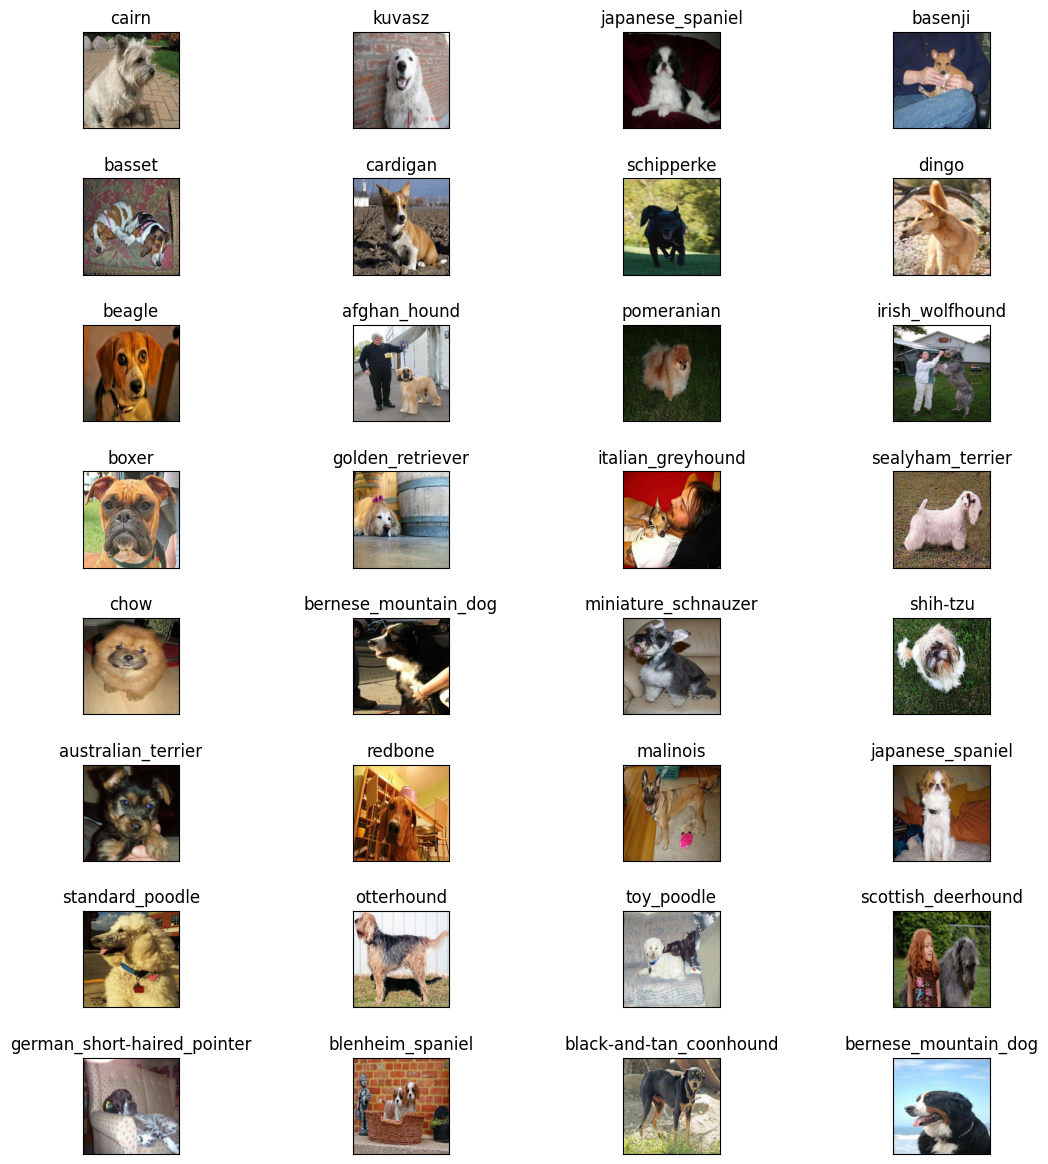

In [69]:
batch_viz(train_batch)

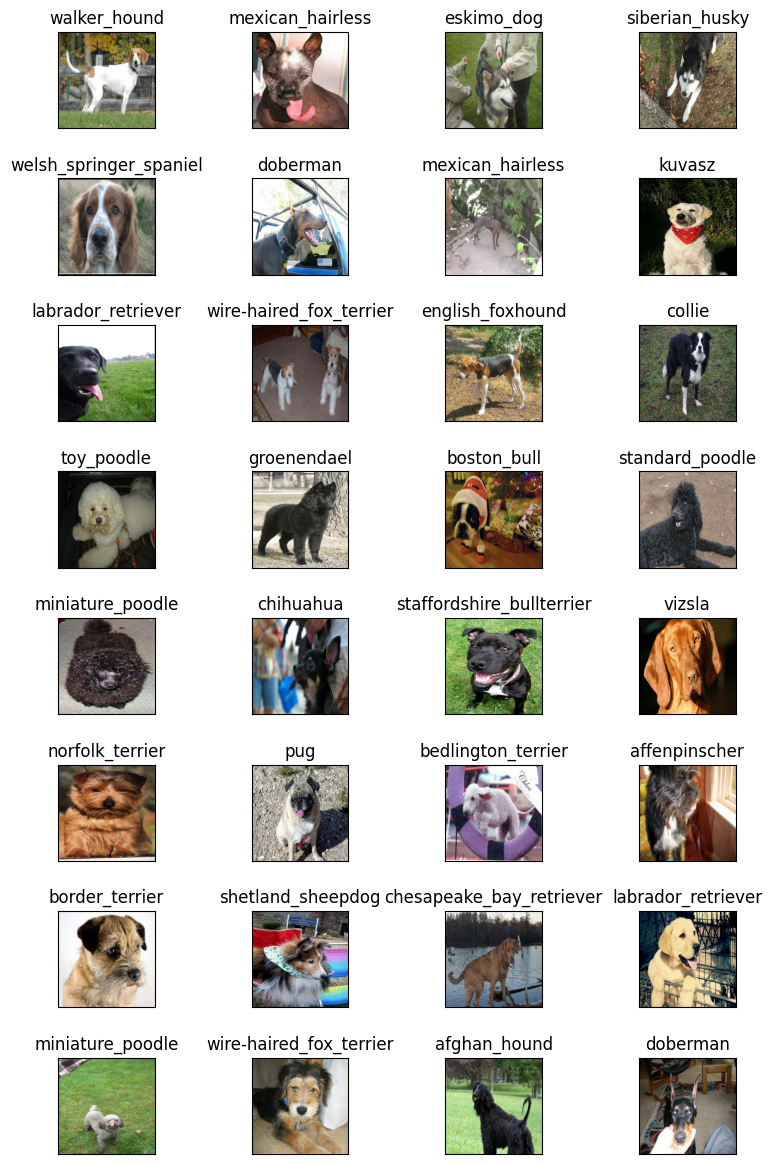

In [50]:
batch_viz(val_batch, 2)

***Now we are ready to do transfer learning using TensorFlow***

In [57]:
import tensorflow_hub as hub
import tf_keras as keras
model_url = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"

In [63]:
def create_model(model_url=model_url):
  m = keras.Sequential([
      hub.KerasLayer(model_url),
      keras.layers.Dense(units=120, activation="softmax")
  ])

  m.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  m.build([None, 224, 224, 3])

  return m

Creating callbacks for TensorBoard for visualization and
Early stopping to stop training of the model incase of no improvement

In [65]:
%load_ext tensorboard

In [72]:
import os
import datetime
def create_tensorboard_callback():
  dir = os.path.join("/content/drive/MyDrive/DogVision/TensorBoard logs"+datetime.datetime.now().strftime("%Y%b%d-%H-%M-%S"))
  return keras.callbacks.TensorBoard(log_dir=dir)

EarlyStopping

In [71]:
def EarlyStopp():
  return keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, verbose=1)

lets train the model

In [64]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [73]:
model.fit(x=train_batch,
          validation_freq=1,
          epochs=100,
          callbacks=[create_tensorboard_callback(), EarlyStopp()],
          validation_data=val_batch)

Epoch 1/100
25/25 [==============================] - 116s 4s/step - loss: 4.5825 - accuracy: 0.1150 - val_loss: 3.5988 - val_accuracy: 0.2300
Epoch 2/100
25/25 [==============================] - 4s 175ms/step - loss: 1.6675 - accuracy: 0.6888 - val_loss: 2.2834 - val_accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 4s 179ms/step - loss: 0.5987 - accuracy: 0.9200 - val_loss: 1.7617 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 4s 162ms/step - loss: 0.2631 - accuracy: 0.9862 - val_loss: 1.5749 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 4s 179ms/step - loss: 0.1548 - accuracy: 0.9962 - val_loss: 1.4890 - val_accuracy: 0.6550
Epoch 6/100
25/25 [==============================] - 5s 184ms/step - loss: 0.1036 - accuracy: 0.9987 - val_loss: 1.4368 - val_accuracy: 0.6800
Epoch 7/100
25/25 [==============================] - 5s 181ms/step - loss: 0.0766 - accuracy: 1.0000 - val_loss: 1.4032 - val_accuracy: 0.6850


In [75]:
!git clone https://github.com/LeUsaid/DogBreed.git

Cloning into 'DogBreed'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 205.08 KiB | 1.08 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [77]:
!rsync -av "/content/drive/MyDrive/Colab Notebooks/DogVision.ipynb" "/content/DogBreed/"

sending incremental file list
DogVision.ipynb

sent 2,325,056 bytes  received 35 bytes  1,550,060.67 bytes/sec
total size is 2,324,393  speedup is 1.00
